## Read data

In [1]:
from os import listdir

In [2]:
comments_batch = []
for file_name in listdir('comments'):
    with open('comments/'+file_name, 'r') as f:
        comments_batch.append(eval(f.read()))

## Remove stop words

In [3]:
from unidecode import unidecode

In [4]:
with open('polish.stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')

In [5]:
comments_batch[1]['row']['comments']['comments']

[{'main_comment': {'id': '100662295',
   'author': 'antyhipokryta',
   'date': '04.07.2018, 21:14',
   'body': 'Poza wszystkim - to ciekawe, że wszyscy prawacy mają takie tępe, dziwaczne i przestraszone ryje. Często też fikuśne bródki czy oprawki okularów. Nieładnie komentować wygląd, ale coś w tym jest, że takiego głupiego prawaka można natychmiast rozpoznać',
   'upvotes': '25',
   'downvotes': '1',
   'suspicious': False},
  'sub_comments': [{'id': '100662401',
    'author': 'Niemiec_z_Niemiec',
    'date': '04.07.2018, 22:27',
    'reply_to': 'antyhipokryta',
    'body': 'Ja ich nawet wrzucam do jednego wora razem z niemieckimi prawakami. Całkiem podobni.',
    'upvotes': '4',
    'downvotes': '0',
    'suspicious': False},
   {'id': '100662439',
    'author': 'calvados',
    'date': '04.07.2018, 23:05',
    'reply_to': 'antyhipokryta',
    'body': 'Masz rację. Oglądając zdjęcie zastanawiałem się gdzie ten "dżentelmen" wcześniej działał. Mam prawo nie wiedzieć bo nie mieszkam w Pol

In [10]:
all_comments = []
for j in comments_batch:
    url = j['row']['comments']['url']
    for main_comment in j['row']['comments']['comments']:
        comment = {
            "url": url,
            "id": main_comment['main_comment']['id'],
            "date": main_comment['main_comment']['date'],
            "author": main_comment['main_comment']['author'],
            "susp" : False,
            "type" : 'main',
            "upvotes": main_comment['main_comment']['upvotes'],
            "downvotes": main_comment['main_comment']['downvotes'],
            "replies": len(main_comment['sub_comments']),
            "length": len(main_comment['main_comment']['body']),
            "words": [],
        }
        
        words = []
        for word in main_comment['main_comment']['body'].split(' '):
            word = word.lower()
            if word not in stop_words:
                comment["words"].append(unidecode(word))
        if len(comment["words"]) != 0:
            comment["susp"] = main_comment['main_comment']["suspicious"]
            all_comments.append(comment)

        for i, sub_comment in enumerate(main_comment['sub_comments']):
            comment = {
            "url": url,
                "id": sub_comment['id'],
                "date": sub_comment['date'],
                "author": sub_comment['author'],
                "susp" : False,
                "type" : 'sub',
                "upvotes": sub_comment['upvotes'],
                "downvotes": sub_comment['downvotes'],
                "replies": len(main_comment['sub_comments']) - i - 1,
                "length": len(sub_comment['body']),
                "words": [],
            }
            
            for word in sub_comment['body'].split(' '):
                word = word.lower()
                if word not in stop_words:
                    comment["words"].append(unidecode(word))
            if len(comment["words"]) != 0:
                comment["susp"] = sub_comment["suspicious"]
                all_comments.append(comment)
                
        

## Calculate average sentence lenght

In [11]:
sentence_lengths = []
for comment in all_comments:
    for sentence in " ".join(comment["words"]).split('.'):
        sentence_lengths.append(len(sentence.split(' ')))

In [12]:
avg_sentence_lenght = round(sum(sentence_lengths) / len(sentence_lengths), 2)

In [13]:
# How many times the second layer should be smaller then first one
avg_sentence_lenght

5.33

## Calculate average number of sentences in comment

In [14]:
comments_sentences_count = []
for comment in all_comments:
    comments_sentences_count.append(len(" ".join(comment["words"])[:-1].split('.')))

In [15]:
avg_sentencte_count = round(sum(comments_sentences_count) / len(comments_sentences_count), 2)

In [16]:
# How many times the third layer should be smaller
avg_sentencte_count

2.73

### Remove special characters

In [17]:
from re import sub

In [18]:
comments = []
for comment in all_comments:
    tmp_comment = comment.copy()
    tmp_comment["words"] = [sub(r"[^a-z]", "", x) for x in comment["words"] if sub(r"[^a-z]", "", x) != '']
    comments.append(tmp_comment)

In [19]:
comments[0]

{'url': 'http://warszawa.wyborcza.pl/warszawa/7,54420,23819304,bohaterki-z-placu-muranowskiego-zostaly-sprawiedliwymi-wsrod.html',
 'id': '100787855',
 'date': '23.08.2018, 23:27',
 'author': 'gipsi18',
 'susp': False,
 'type': 'main',
 'upvotes': '6',
 'downvotes': '0',
 'replies': 0,
 'length': 131,
 'words': ['czytajac',
  'historie',
  'zastanawiam',
  'bym',
  'zrobila',
  'wystarczyloby',
  'odwagi',
  'strasznie',
  'boje',
  'nie']}

In [20]:
len(comments)

495204

In [21]:
import pandas as pd

In [22]:
pd.DataFrame(comments[:300000]).to_csv('processed_comments_1.csv', index = False)

In [23]:
pd.DataFrame(comments[300000:]).to_csv('processed_comments_2.csv', index = False)

# Lets visualize those two types: suspicious and normal to see whether there are differences or not

In [16]:
to_cloud = {
    "susp": [],
    "rest": [],
}
for comment in comments:
    if comment["susp"]:
        for word in comment["words"]:
            to_cloud["susp"].append(word)
    else:
        for word in comment["words"]:
            to_cloud["rest"].append(word)

In [17]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 1199.5, 299.5, -0.5)

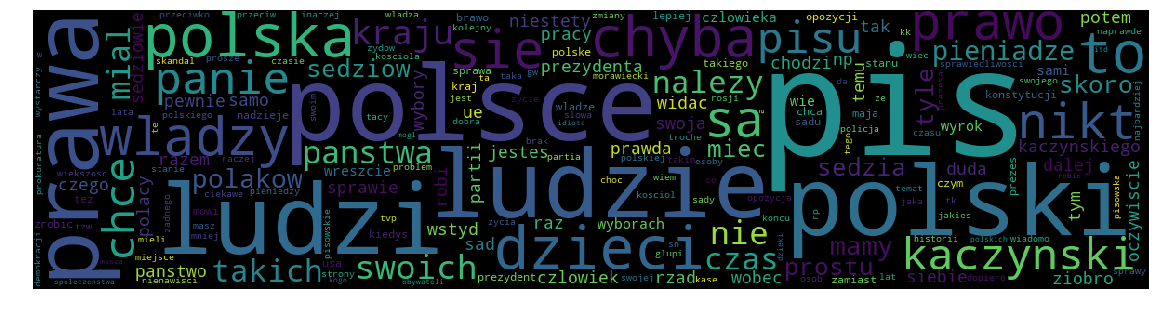

In [18]:
word_could_dict = Counter(to_cloud["susp"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1199.5, 299.5, -0.5)

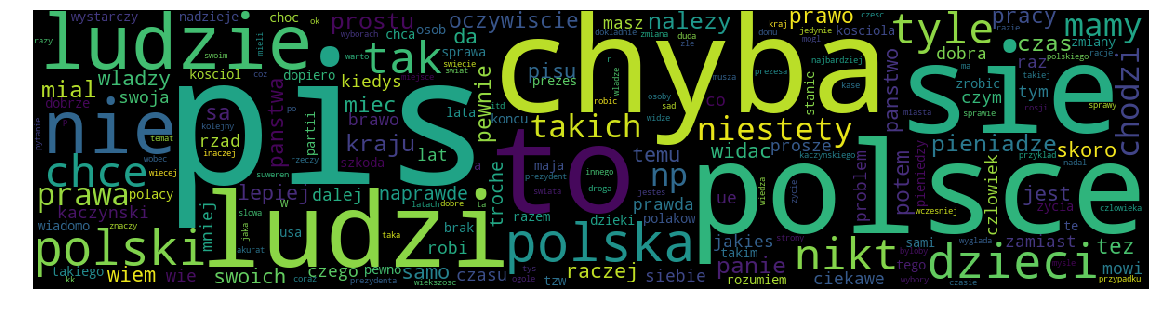

In [19]:
word_could_dict=Counter(to_cloud["rest"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")

## Perform basic data mining

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(comments).drop('words', axis = 1).astype(int, errors = 'ignore')

In [29]:
len(df)

459805

In [22]:
df.head(3)

,author,date,downvotes,id,length,replies,susp,type,upvotes
0,gipsi18,"23.08.2018, 23:27",0,100787855,131,0,0,main,6
1,aneka72,"24.08.2018, 01:36",0,100787985,12,0,0,main,5
2,antyhipokryta,"04.07.2018, 21:14",1,100662295,249,4,0,main,25


In [23]:
df[['susp', 'date']].groupby('susp').count()

,date
susp,
0,413217
1,46588


In [24]:
df[['susp', 'length']]\
    .groupby('susp')\
    .mean()

,length
susp,
0,161.405533
1,188.447712


In [25]:
df['upvotes'] = df['upvotes'].astype(int)

df[['susp', 'upvotes']]\
    .groupby('susp')\
    .mean()

,upvotes
susp,
0,14.470917
1,16.064995


In [26]:
df['downvotes'] = df['downvotes'].astype(int)

df[['susp', 'downvotes']]\
    .groupby('susp')\
    .mean()

,downvotes
susp,
0,1.471331
1,1.485082


In [27]:
df[['susp', 'replies']]\
    .groupby('susp')\
    .mean()

,replies
susp,
0,1.269655
1,1.312784


In [32]:
tmp = df[['susp', 'type', 'date']]\
    .groupby(['susp', 'type'])\
    .count()\
    .reset_index()\
    .pivot('susp', 'type', 'date')
tmp['perc'] = round(tmp['main'] / (tmp['main'] + tmp['sub']), 2)
print(tmp)

type    main     sub  perc
susp                      
0     250913  162304  0.61
1      29642   16946  0.64
